In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('healthexp')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [4]:
max_life_expectancy = data['Life_Expectancy'].max()
Country = data[data['Life_Expectancy'] == max_life_expectancy]['Country'].values[0]
print(f'The country with the highest life expectancy is {Country} with a life expectancy of {max_life_expectancy}')

The country with the highest life expectancy is Japan with a life expectancy of 84.7


In [5]:
top_5 = data.sort_values(by='Life_Expectancy', ascending=False).head(5)

print('The top 5 countries with the highest life expectancy rates are:')
for i, row in top_5.iterrows():
    print(f'{i+1}. {row["Country"]} with a life expectancy of {row["Life_Expectancy"]}')

The top 5 countries with the highest life expectancy rates are:
273. Japan with a life expectancy of 84.7
267. Japan with a life expectancy of 84.4
261. Japan with a life expectancy of 84.3
255. Japan with a life expectancy of 84.2
249. Japan with a life expectancy of 84.1


In [6]:
max_spending = data['Spending_USD'].max()
Country = data[data['Spending_USD'] == max_spending]['Country'].values[0]
print(f'The country with the highest spending is {Country} with a spending of USD {max_spending}')

The country with the highest spending is USA with a spending of USD 11859.179


In [7]:
df = data[['Spending_USD', 'Life_Expectancy']]
df.head()

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9


In [8]:
data.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [9]:
train, test = train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(191, 4)
(83, 4)


In [10]:
x = train['Spending_USD'].values.reshape(-1,1)
y = train['Life_Expectancy'].values.reshape(-1,1)

In [11]:
from sklearn.linear_model import LinearRegression
HEmodel = LinearRegression()
print('HE Model Training is Done')
train_HEmodel = HEmodel.fit(x,y)
print(HEmodel)

HE Model Training is Done
LinearRegression()


In [12]:
print(HEmodel.coef_)  
print(HEmodel.intercept_)

[[0.00090146]]
[75.33418034]


In [13]:
x = 10000
y = round((HEmodel.coef_[0][0])*x + (HEmodel.intercept_[0]))
print("The Life expentacy of spending {} USD is {} years.".format(x,y))

The Life expentacy of spending 10000 USD is 84 years.


In [14]:
x_test = test['Spending_USD'].values.reshape(-1,1)
pre_LE = train_HEmodel.predict(x_test)
pre_LE

array([[85.11997845],
       [77.69987158],
       [79.51269742],
       [77.38793178],
       [79.42370183],
       [77.54328824],
       [76.35735377],
       [77.11561199],
       [77.28985039],
       [80.01249847],
       [78.89122111],
       [78.72270426],
       [76.00665126],
       [80.26373225],
       [77.45183708],
       [75.93344922],
       [80.119443  ],
       [78.05809136],
       [78.640402  ],
       [76.73868244],
       [78.04700071],
       [76.82261363],
       [77.19764561],
       [84.39065795],
       [77.10301861],
       [77.41085227],
       [77.94438319],
       [78.71535918],
       [76.46408195],
       [75.50130173],
       [79.08328135],
       [76.58406157],
       [78.19107362],
       [79.21789074],
       [75.68133111],
       [76.96150135],
       [84.09423766],
       [75.62892212],
       [77.75687711],
       [76.99988274],
       [76.64950746],
       [75.97859426],
       [77.75902799],
       [80.12680431],
       [78.48536556],
       [78

In [15]:
test['Pre_LE'] = pre_LE
test['Error'] = test['Life_Expectancy'] - test['Pre_LE']
test

,Year,Country,Spending_USD,Life_Expectancy,Pre_LE,Error
267,2019,USA,10855.517,78.8,85.119978,-6.319978
154,2001,Canada,2624.293,79.3,77.699872,1.600128
238,2015,Canada,4635.285,81.9,79.512697,2.387303
142,1999,Canada,2278.254,78.8,77.387932,1.412068
153,2000,USA,4536.561,76.7,79.423702,-2.723702
...,...,...,...,...,...,...
236,2014,Japan,4328.364,83.7,79.236021,4.463979
45,1981,Great Britain,433.957,73.8,75.725375,-1.925375
226,2013,Canada,4428.753,81.7,79.326517,2.373483
131,1997,Germany,2496.201,77.3,77.584402,-0.284402


<Axes: xlabel='Spending_USD', ylabel='Pre_LE'>

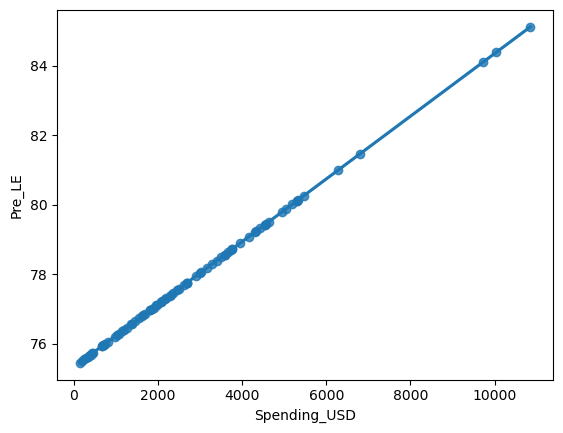

In [16]:
sns.regplot(x = 'Spending_USD', y = 'Pre_LE', data = test)

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

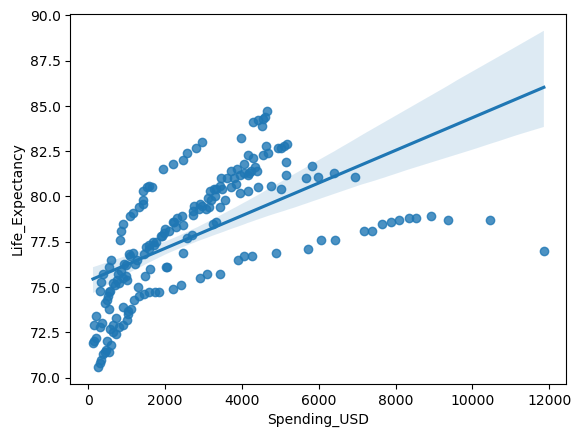

In [17]:
sns.regplot(x = 'Spending_USD', y = 'Life_Expectancy', data = train)